# Assignment 2

# Part 1: Image segmentation

## Question 1: Color clustering with K-means (15 points)

Image segmentation is the process of partitioning an image into various regions of pixels that are more meaningful and easier to understand/analyze. It is often used to specify boundaries and separate the most important object(s) from the rest. One way to segment images is to use K-means clustering to cluster image regions with similar colors. Remember that K-means clustering is an unsupervised algorithm that partitions the given data into K clusters based on some definition of similarity.

**Do this**:

1-a. Implement the K-means clustering algorithm in `kmeans.py`. (10 points) (Note: Use L2-distance with the color values for the distance.)

1-b. Experiment with different values of K. Discuss which value of K seems to be the best for each of the test images. (5 points)

In [1]:
import cv2, pickle
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

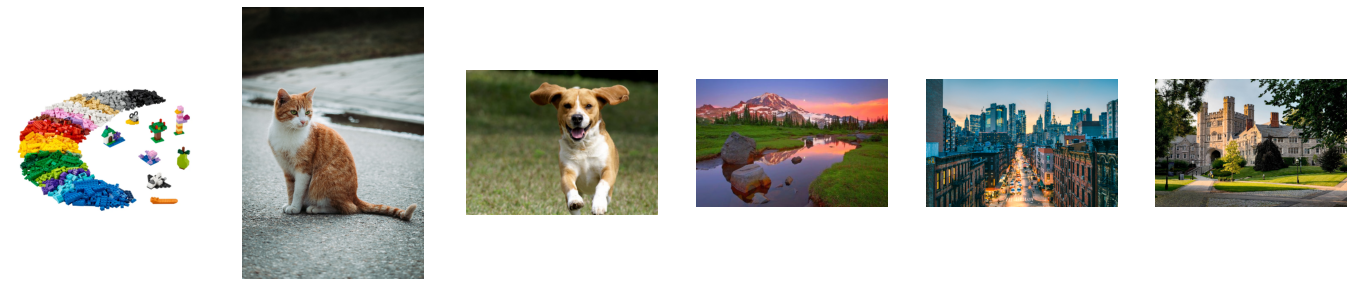

In [2]:
# Here are images you will use to check your implementation.
filenames = ['imgs/lego.png', 'imgs/cat.jpeg', 'imgs/dog.jpeg',  'imgs/nature.jpeg', 'imgs/nyc.jpeg', 'imgs/princeton.jpeg']

plt.figure(figsize=(4*len(filenames), 5))
for i in range(len(filenames)):
    img = cv2.imread(filenames[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, nchannel = img.shape
    scale = 500/max(height, width) # The longer side will be resized to 500
    img = cv2.resize(img, (int(width*scale), int(height*scale)))
    plt.subplot(1, len(filenames), i+1)
    plt.imshow(img); plt.axis('off')
plt.show()

### 1-a. Implement the K-means clustering algorithm in `kmeans.py` (10 points)

After implementing the K-means clustering algorithm in `kmeans.py`, use the below code to segment a given image into regions with similar colors.

In [7]:
# Import your implementation
from kmeans import kmeans
import importlib
from os import sys
importlib.reload(sys.modules["kmeans"])

<module 'kmeans' from '/Users/shiho/Documents/princeton_courses/COS429_CV/A2_starter_code/kmeans.py'>

In [8]:
def run_kmeans(K, niter, filename):
    
    # Load and transform an image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, nchannel = img.shape
    scale = 500/max(height, width) # The longer side will be resized to 500
    img = cv2.resize(img, (int(width*scale), int(height*scale)))

    # Vectorize the image
    x = img.reshape((-1, 3)).astype(np.float32)

    # Run K-means clustering
    labels, centroids = kmeans(x, K, niter)
    # Produce the resulting image segmentation. 
    centroids = np.uint8(centroids)
    labels = np.int8(labels)
    result = centroids[labels.flatten()]
    result_image = result.reshape((img.shape))

    # Visualize the original image and the segmentation.
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.imshow(img); plt.title('Original Image'); plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(result_image); plt.title('Segmented Image (K={})'.format(K)); plt.axis('off')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    for k in range(K):
        plt.subplot(1,K,k+1)
        result_image = np.ones_like(img) * 128
        
        result_image[labels.reshape((img.shape[:2]))==k] = centroids[k]
        
        plt.imshow(result_image); plt.title(f'Seg ID: {k}'); plt.axis('off')
    print("")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


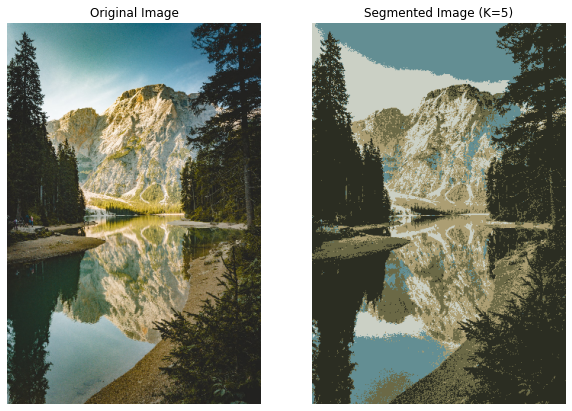

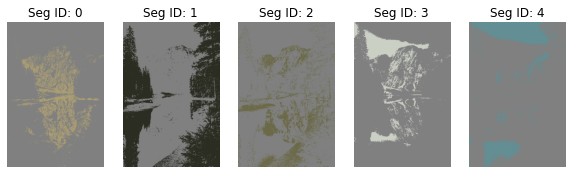

In [9]:
# Define the arguments
K = 5
niter = 20

filename = 'imgs/example.jpeg'

# Run K-means
a = run_kmeans(K, niter, filename)

### b) Experiment with different values of K. Discuss which value of K seems to be the best for each of the test images. (5 points)

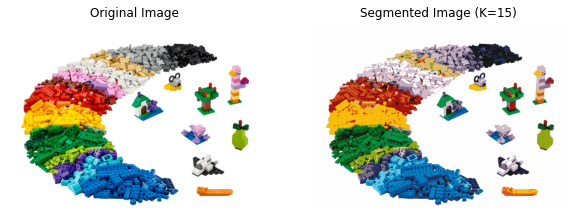

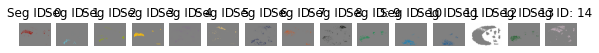

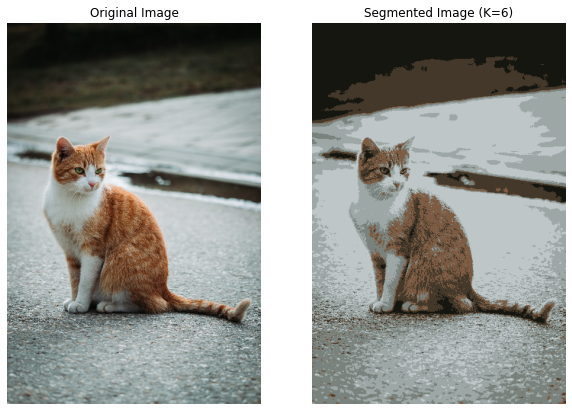

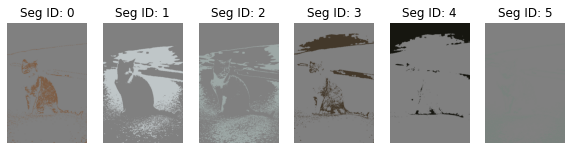

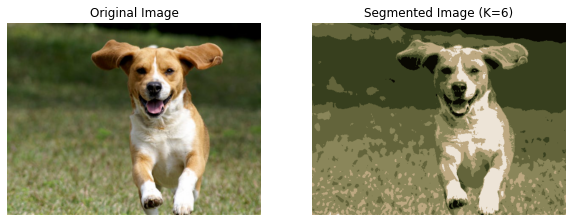

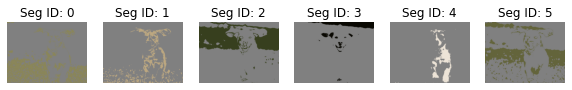

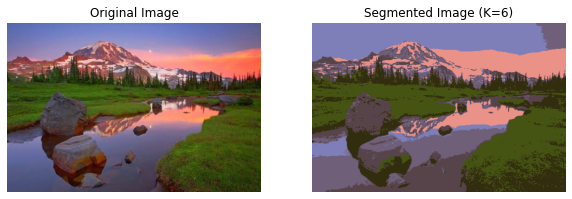

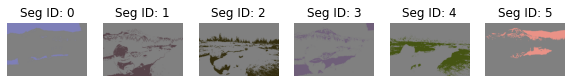

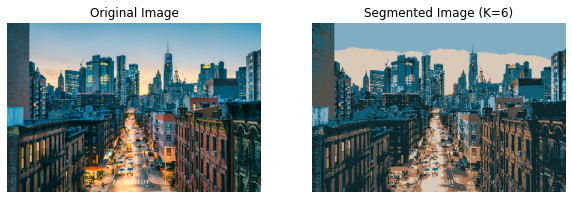

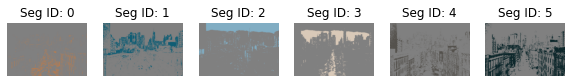

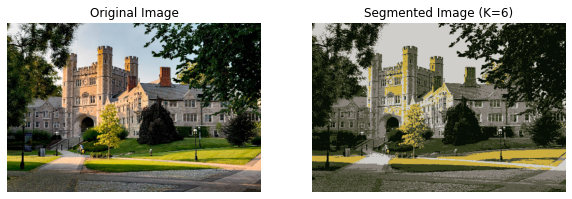

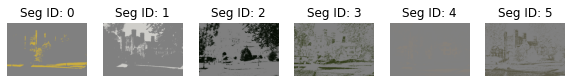

In [65]:
# Define the arguments
# K = 5
niter = 20
K = [15,6,6,6,6,6]
# Run K-means
for i in range(len(filenames)):
    run_kmeans(K[i], niter, filenames[i])